In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 24s 2us/step


In [3]:
#normalizing the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
#building the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [5]:
#compiling the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [6]:
#training the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2620 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1067 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0724 - accuracy: 0.9773


In [7]:
#evaluating the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0983 - accuracy: 0.9705
0.09826397895812988
0.9704999923706055


In [8]:
#saving the model
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [9]:
#loading the model
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [10]:
#predicting the model
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

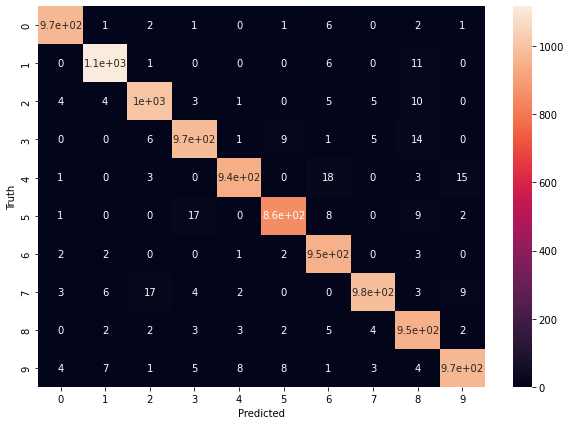

In [11]:
#plotting the confusion matrix
cm = confusion_matrix(y_test, predictions.argmax(axis=1))
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
#calculating the accuracy
accuracy = accuracy_score(y_test, predictions.argmax(axis=1))
print('Accuracy: %f' % accuracy)

Accuracy: 0.970500


In [18]:
#calculating the precision
precision = precision_score(y_test, predictions.argmax(axis=1), average='macro')
print('Precision: %f' % precision)

Precision: 0.970524


In [21]:
#calculating the recall
recall = recall_score(y_test, predictions.argmax(axis=1), average='macro')
print('Recall: %f' % recall)

Recall: 0.970350


In [22]:
#calcilating accuracy score
accuracy = accuracy_score(y_test, predictions.argmax(axis=1))
print('Accuracy: %f' % accuracy)

Accuracy: 0.970500


In [23]:
#calculating the f1 score
f1 = f1_score(y_test, predictions.argmax(axis=1), average='macro')
print('F1 score: %f' % f1)

F1 score: 0.970322
